# Machine Learning Assignment

#### <div style="text-align: right">WOORAM JUNG(c1032849)</div>


# Cleaning and pre-processing <a class="anchor" id="heading_1_1"></a>


In [70]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
df = pd.read_csv('cwdata.csv')
encoder = LabelEncoder()

In [71]:
def printDataInfo(data):
    print("-------------------------------------------------------------------")
    print(data.isnull().sum())
    print("-------------------------------------------------------------------")
    print(data.info())
    print("-------------------------------------------------------------------")
    print(data)

printDataInfo(df)

-------------------------------------------------------------------
Income        0
Post-code     1
Employed      2
Home Owner    3
Education     3
Gender        2
Balance       1
Age           0
Colour        0
Fraud         0
dtype: int64
-------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Income      120 non-null    int64 
 1   Post-code   119 non-null    object
 2   Employed    118 non-null    object
 3   Home Owner  117 non-null    object
 4   Education   117 non-null    object
 5   Gender      118 non-null    object
 6   Balance     119 non-null    object
 7   Age         120 non-null    object
 8   Colour      120 non-null    object
 9   Fraud       120 non-null    object
dtypes: int64(1), object(9)
memory usage: 9.5+ KB
None
---------------------------------------------------

In [72]:
# handle inconsistencies in variable and fill in missing values with the mode (most frequent value)
df['Education'] = df['Education'].str.strip()
df['Education'] = df['Education'].replace({
    'School': 'S', 
    'College': 'C',
    'Coll': 'C',
    'University': 'U',
    'Uni': 'U',
    '': np.nan})
df['Education'] = df['Education'].fillna(df['Education'].mode().iloc[0])
# transform to numuric data
df['Education'] = encoder.fit_transform(df['Education'].values)
# print(df['Education'])

In [73]:
# handle inconsistencies in variable and fill in missing values with the mode (most frequent value)
df['Employed'] = df['Employed'].fillna(df['Employed'].mode().iloc[0])
df['Employed'] = df['Employed'].replace({'Yes': 'Y', 'No': 'N'})
# transform to numuric data
df['Employed'] = encoder.fit_transform(df['Employed'].values)
# print(df['Employed'])

In [74]:
# handle inconsistencies in variable and fill in missing values with the mode (most frequent value)
df['Home Owner'] = df['Home Owner'].fillna(df['Home Owner'].mode().iloc[0])
df['Home Owner'] = df['Home Owner'].replace({'Yes': 'Y', 'No': 'N'})
# transform to numuric data
df['Home Owner'] = encoder.fit_transform(df['Home Owner'].values)
# print(df['Home Owner'])

In [75]:
# handle inconsistencies
df['Fraud'] = df['Fraud'].replace({ 'No': 'N',  'Yes': 'Y','1':'Y','0':'N'})
# transform to numuric data
df['Fraud'] = encoder.fit_transform(df['Fraud'].values)
# print(df['Fraud'])

In [76]:
# handle inconsistencies
df['Gender'] = df['Gender'].fillna(df['Gender'].mode().iloc[0])
df['Gender'] = df['Gender'].replace({'Male':'M','Female':'F' })
# transform to numuric data
df['Gender'] = encoder.fit_transform(df['Gender'].values)
# print(df['Gender'] )

In [77]:
# fill in missing value with median and convert numuric value
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'] = df['Age'].fillna(df['Age'].median()).round(0)
# print(df['Age'])

In [78]:
# Fill in missing values with the mean and change string to float
df['Balance'] = pd.to_numeric(df['Balance'], errors='coerce')
df['Balance'] = df['Balance'].fillna(df['Balance'].mean()).round(0)
# print(df['Balance'])

In [79]:
# Fill in missing values with the mode
df['Post-code'] = df['Post-code'].fillna(df['Post-code'].mode().iloc[0])
# transform to numuric data
df['Post-code'] = encoder.fit_transform(df['Post-code'].values)
# print(df['Post-code'])

In [80]:
# handle inconsistencies
df['Colour'] = df['Colour'].replace({'Res':'Red'})
# transform to numuric data
df['Colour'] = encoder.fit_transform(df['Colour'].values)

In [81]:
# Save for backup
# df.to_csv('cleaned_data.csv', index=False) 

In [82]:
#show all cleaned data
printDataInfo(df)

-------------------------------------------------------------------
Income        0
Post-code     0
Employed      0
Home Owner    0
Education     0
Gender        0
Balance       0
Age           0
Colour        0
Fraud         0
dtype: int64
-------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Income      120 non-null    int64  
 1   Post-code   120 non-null    int64  
 2   Employed    120 non-null    int64  
 3   Home Owner  120 non-null    int64  
 4   Education   120 non-null    int64  
 5   Gender      120 non-null    int64  
 6   Balance     120 non-null    float64
 7   Age         120 non-null    float64
 8   Colour      120 non-null    int64  
 9   Fraud       120 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 9.5 KB
None
---------------------------------------

# Find features

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.options.display.max_rows = None
pd.options.display.max_columns = None
df = pd.read_csv('cleaned_data.csv')

In [84]:
# check correlation and show bigger than 0.5 and sort
corr = df.corr()
unstack = corr.unstack()
print(unstack[unstack < 1][unstack > 0.5].sort_values(ascending=False))

Income      Balance       0.676333
Balance     Income        0.676333
Employed    Home Owner    0.594028
Home Owner  Employed      0.594028
Income      Home Owner    0.529223
Home Owner  Income        0.529223
Income      Employed      0.524189
Employed    Income        0.524189
dtype: float64


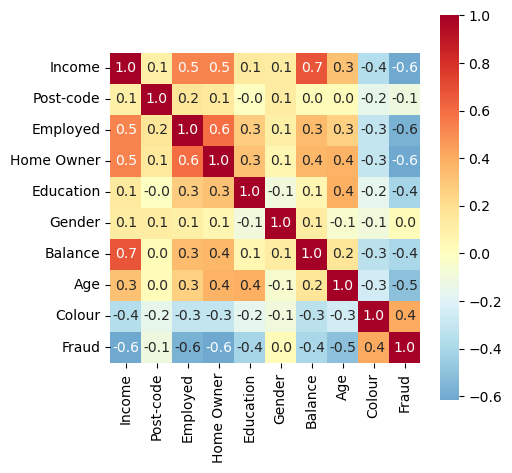

In [85]:
# show correlation in heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr, center=0, annot=True,
            fmt='.1f', square=True, cmap = 'RdYlBu_r')
plt.show()

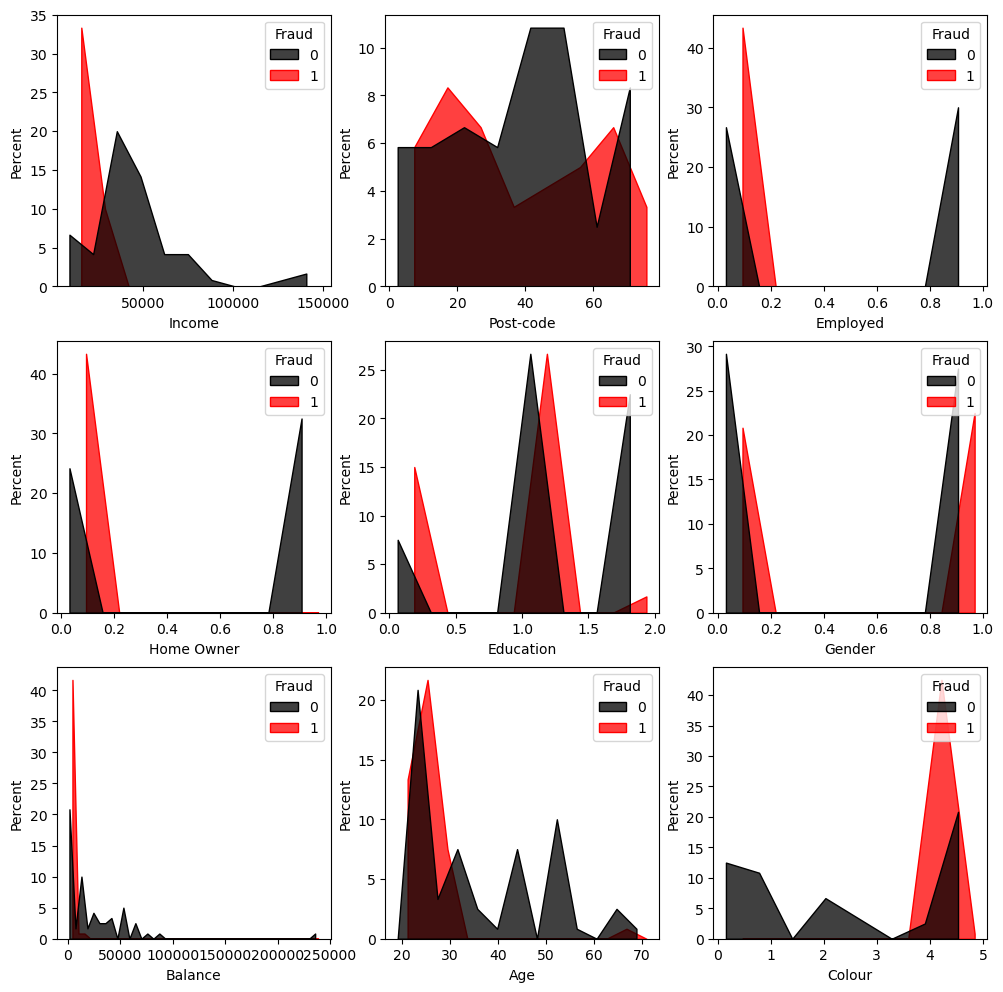

In [86]:
fig, axs = plt.subplots(figsize=(12,12) , ncols=3 , nrows=3)
for i , feature in enumerate(df.columns):
    if feature != 'Fraud':
        row = int(i/3)
        col = i%3
        sns.histplot(data=df, x=feature, hue="Fraud",
                     palette=['#000000', '#FF0000'], 
                     ax=axs[row][col],multiple='dodge', 
                     element='poly',stat='percent')